In [1]:
import torch
from torchvision.models.video import r2plus1d_18,R2Plus1D_18_Weights,swin3d_t,Swin3D_T_Weights,mvit_v2_s,MViT_V2_S_Weights
from torchvision.io import read_video
import pandas as pd

from helper import plot,interpret_pred

In [2]:
cols = ['Healthy Lifestyle and Weight Loss', 'Weight Lifting', 'Running',
       'Yoga', 'Haircare', 'Makeup', 'Skincare', 'Outfit', 'Accommodation',
       'Adventure', 'Culture', 'Food and drink']

In [3]:
def models(name,data):
    if name == 'mvit':
        weight = MViT_V2_S_Weights.KINETICS400_V1
        model = mvit_v2_s(weights=weight)
        transforms = weight.transforms()
        trans_data = transforms(data)
        return model,trans_data,weight
    elif name == 'swin':
        weight = Swin3D_T_Weights.KINETICS400_V1
        model = swin3d_t(weights=weight)
        transforms = weight.transforms()
        trans_data = transforms(data)
        return model,trans_data,weight
    elif name == 'resnet':
        weight = R2Plus1D_18_Weights.KINETICS400_V1
        model = r2plus1d_18(weights=weight)
        transforms = weight.transforms()
        trans_data = transforms(data)
        return model,trans_data,weight

In [4]:
vid_path = 'data/test/Beauty_137.mp4'
annotate_path = 'data/validate_label.csv'

frames,_,_ = read_video(vid_path,output_format='TCHW')
frames = frames[:16]

_,_,filename = vid_path.split('/')
annotate_file = pd.read_csv(annotate_path)
true_label = annotate_file.loc[annotate_file['filename'] == filename,cols].values.tolist()[0]
text_label = interpret_pred(true_label)

/Users/itthisak/Desktop/Nida/dads-7202-final-project/venv/lib/python3.10/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


## MViT Small

True: Outfit
Predict: punching bag


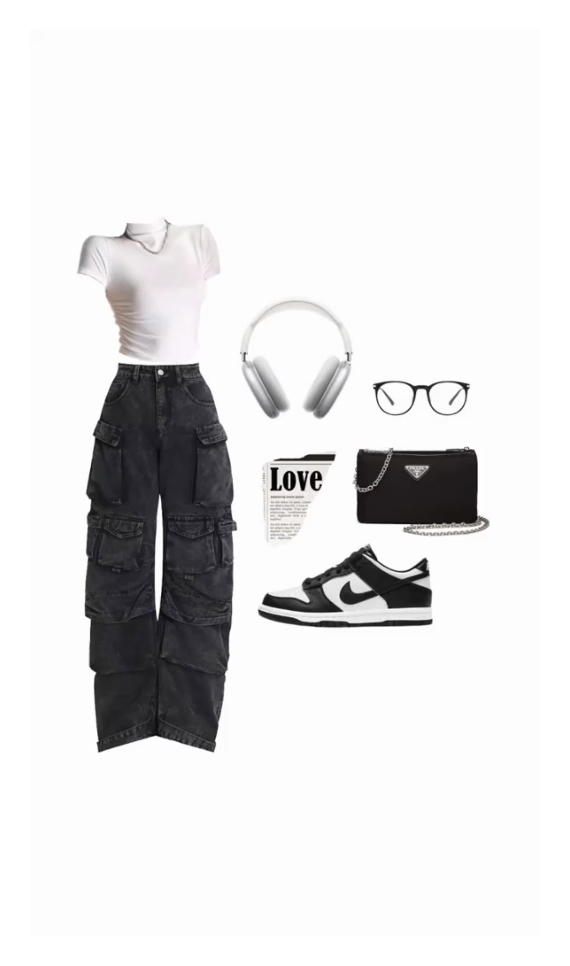

In [5]:
model,trans_frames,weight = models('mvit',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_mvit = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_mvit}")
    plot(frames,1,1,1)

## SWIN3D Tiny

True: Outfit
Predict: robot dancing


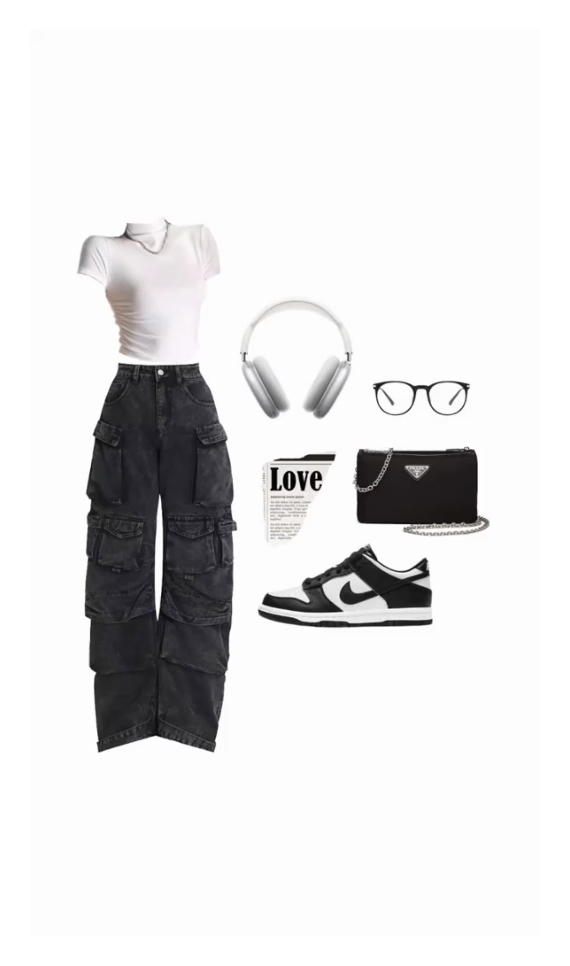

In [6]:
model,trans_frames,weight = models('swin',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_swin = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_swin}")
    plot(frames,1,1,1)

## Resnet 2+1D

True: Outfit
Predict: ironing


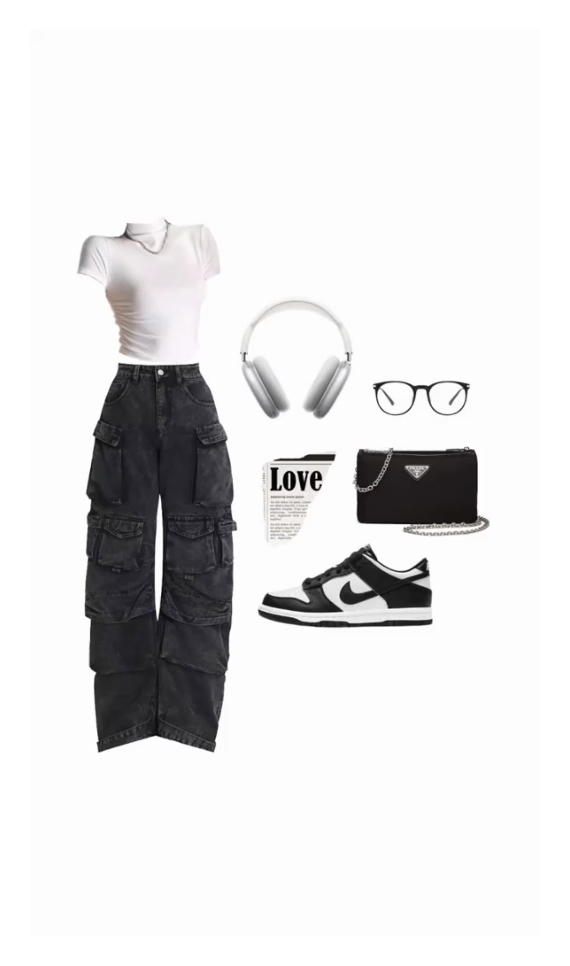

In [7]:
model,trans_frames,weight = models('resnet',frames)
with torch.no_grad():
    model.eval()
    pred = model(trans_frames.unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()
    category_name_res = weight.meta["categories"][class_id]
    print(f"True: {str.join(',',text_label)}\nPredict: {category_name_res}")
    plot(frames,1,1,1)

In [8]:
print(f"True Label: {str.join(',',text_label)}\nMViT: {category_name_mvit}\nSWIN3D: {category_name_swin}\nResnet2+1D: {category_name_res}")

True Label: Outfit
MViT: punching bag
SWIN3D: robot dancing
Resnet2+1D: ironing
